In [1]:
%matplotlib inline

In [2]:
# !pip install torchaudio

The code you provided performs the following tasks:

1. Importing Packages:

os: This module provides functions for interacting with the operating system, such as creating directories.
IPython (likely not used explicitly in this code): This module enhances interactive computing in Python.
matplotlib and matplotlib.pyplot: These modules are used for data visualization and creating plots.
requests: This module helps fetch data from URLs, likely used for downloading audio in this case.
torch: This is the PyTorch library, a deep learning framework used for various tasks, including audio processing.
torchaudio: This library provides functionalities for audio processing within PyTorch.
2. Setting Matplotlib Configuration:

matplotlib.rcParams["figure.figsize"] = [16.0, 4.8]: This line sets the default figure size for plots created using Matplotlib to be 16 inches wide and 4.8 inches high.
3. Setting Random Seed:

torch.random.manual_seed(0): This line sets a seed for PyTorch's random number generator. This ensures reproducibility of results, meaning if you run the code again, you'll get the same random values.
4. Checking Device Availability:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu"): This line checks if a GPU is available on your system. If a GPU is available, the code sets the device to "cuda" to leverage GPU acceleration for computations. Otherwise, it defaults to "cpu".
The code then prints the versions of PyTorch and torchaudio libraries along with the detected device ("cuda" or "cpu").
5. Downloading Audio Data:

SPEECH_URL: This variable stores the URL from which the audio data (a speech waveform) will be downloaded.

SPEECH_FILE: This variable specifies the filename where the downloaded audio will be saved.

The code checks if the file SPEECH_FILE already exists. If not:

It creates a directory named "_assets" if it doesn't exist using os.makedirs("_assets", exist_ok=True).
It downloads the audio data from the URL using requests.get(SPEECH_URL).content and saves it to the specified file using with open(SPEECH_FILE, "wb") as file: file.write(...).
In essence, this code snippet sets up the environment for working with audio data using PyTorch and torchaudio. It downloads a speech waveform from a URL and stores it locally for further processing.

In [3]:
# import packages and fetch data 

import os

import IPython
import matplotlib
import matplotlib.pyplot as plt
import requests
import torch
import torchaudio

matplotlib.rcParams["figure.figsize"] = [16.0, 4.8]

torch.random.manual_seed(0)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print(torch.__version__)
print(torchaudio.__version__)
print(device)

SPEECH_URL = "https://pytorch-tutorial-assets.s3.amazonaws.com/VOiCES_devkit/source-16k/train/sp0307/Lab41-SRI-VOiCES-src-sp0307-ch127535-sg0042.wav"  # noqa: E501
SPEECH_FILE = "_assets/speech.wav"

if not os.path.exists(SPEECH_FILE):
    os.makedirs("_assets", exist_ok=True)
    with open(SPEECH_FILE, "wb") as file:
        file.write(requests.get(SPEECH_URL).content)

2.2.1+cpu
2.2.1+cpu
cpu


The code you provided utilizes the torchaudio library to explore a pre-trained Wav2Vec 2.0 model for Automatic Speech Recognition (ASR). Here's a breakdown of what it does:

1. Importing Necessary Module:

torchaudio.pipelines.WAV2VEC2_ASR_BASE_960H: This line imports the WAV2VEC2_ASR_BASE_960H class from the torchaudio.pipelines module. This class represents a pre-trained Wav2Vec 2.0 model specifically designed for ASR tasks.
2. Accessing Sample Rate:

print("Sample Rate:", bundle.sample_rate): This line retrieves the audio sample rate supported by the pre-trained model (bundle). The sample rate refers to the number of audio samples collected per second.
3. Printing Labels:

print("Labels:", bundle.get_labels()): This line calls the get_labels method of the model (bundle). This method likely returns a list of all the labels (words or characters) that the model can recognize in spoken language.
Understanding Wav2Vec 2.0 ASR:

Wav2Vec 2.0 is a powerful model architecture for speech recognition. It can learn representations of speech audio and convert them into text.
The pre-trained model you're using (WAV2VEC2_ASR_BASE_960H) is likely trained on a large speech dataset and can recognize a variety of words or phonemes (basic units of sound).
Output Interpretation:

The code will print the sample rate supported by the model (e.g., 16 kHz or 22 kHz).
It will also print a list of all the labels (words or characters) that the model is capable of recognizing. This can be a large vocabulary depending on the specific model and training data.

In [4]:
bundle = torchaudio.pipelines.WAV2VEC2_ASR_BASE_960H
print("Sample Rate:", bundle.sample_rate)
print("Labels:", bundle.get_labels())

Sample Rate: 16000
Labels: ('-', '|', 'E', 'T', 'A', 'O', 'N', 'I', 'H', 'S', 'R', 'D', 'L', 'U', 'M', 'W', 'C', 'F', 'G', 'Y', 'P', 'B', 'V', 'K', "'", 'X', 'J', 'Q', 'Z')


In [5]:
# import ssl
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# fetch pre-trained weights and load into model
model = bundle.get_model().to(device)
print(model.__class__)

<class 'torchaudio.models.wav2vec2.model.Wav2Vec2Model'>


In [6]:
# load data
IPython.display.Audio(SPEECH_FILE)

The code snippet handles loading and preprocessing audio data for the pre-trained speech recognition model. Here's a breakdown:

1. Loading Audio Data:

waveform, sample_rate = torchaudio.load(SPEECH_FILE): This line uses the torchaudio.load function to load the audio data from the specified file (SPEECH_FILE).
It returns two values:
waveform: A tensor representing the audio waveform, holding numerical values for the audio samples.
sample_rate: The sample rate of the audio file (number of samples per second).
2. Moving Data to Device:

waveform = waveform.to(device): This line moves the loaded waveform tensor to the specified device (CPU or GPU) for computations.
3. Checking and Resampling:

if sample_rate != bundle.sample_rate:: This line checks if the sample rate of the loaded audio file matches the sample rate expected by the pre-trained model (bundle.sample_rate).
If the sample rates are different, resampling is necessary.
waveform = torchaudio.functional.resample(waveform, sample_rate, bundle.sample_rate): If resampling is needed, this line uses the torchaudio.functional.resample function to adjust the sample rate of the waveform to match the model's requirement.
Importance of Sample Rate:

Resampling is crucial because pre-trained models often have specific sample rate requirements.
Mismatched sample rates can lead to degraded speech recognition performance.
Output:

The code prepares a waveform tensor compatible with the pre-trained speech recognition model, ensuring a consistent sample rate for accurate processing.

In [7]:
# !pip install soundfile

In [8]:
import soundfile

In [9]:
!pip show soundfile

Name: soundfile
Version: 0.12.1
Summary: An audio library based on libsndfile, CFFI and NumPy
Home-page: https://github.com/bastibe/python-soundfile
Author: Bastian Bechtold
Author-email: basti@bastibe.de
License: BSD 3-Clause License
Location: c:\users\gupta\anaconda3\lib\site-packages
Requires: cffi
Required-by: 


In [14]:
# loading data into model and check for sample rate 

# waveform, sample_rate = torchaudio.load(SPEECH_FILE, format="wav")
# waveform = waveform.to(device)

   
import scipy.io.wavfile as wav

sample_rate, waveform = wav.read("_assets/speech.wav")
# Convert waveform to a torch tensor (if necessary)
waveform = torch.from_numpy(waveform).float()

if sample_rate != bundle.sample_rate:
    waveform = torchaudio.functional.resample(waveform, sample_rate, bundle.sample_rate)
  

Reshape waveform Tensor:

The Wav2Vec 2.0 model likely expects the audio data to be represented as a 2D tensor with two dimensions:

Batch dimension (if processing multiple audio samples at once).
Time dimension (representing the sequence of audio samples).

In current code, the waveform tensor only have the time dimension ([54400]).

To fix this, need to reshape the waveform tensor to include a batch dimension. Although, here we have just one audio sample

###### The unsqueeze(0) method inserts a new dimension at index 0, effectively adding a batch dimension of size 1.

In [15]:
# extract acoutic features
with torch.inference_mode():
    waveform = waveform.unsqueeze(0)  # Add a batch dimension
    features, _ = model.extract_features(waveform)

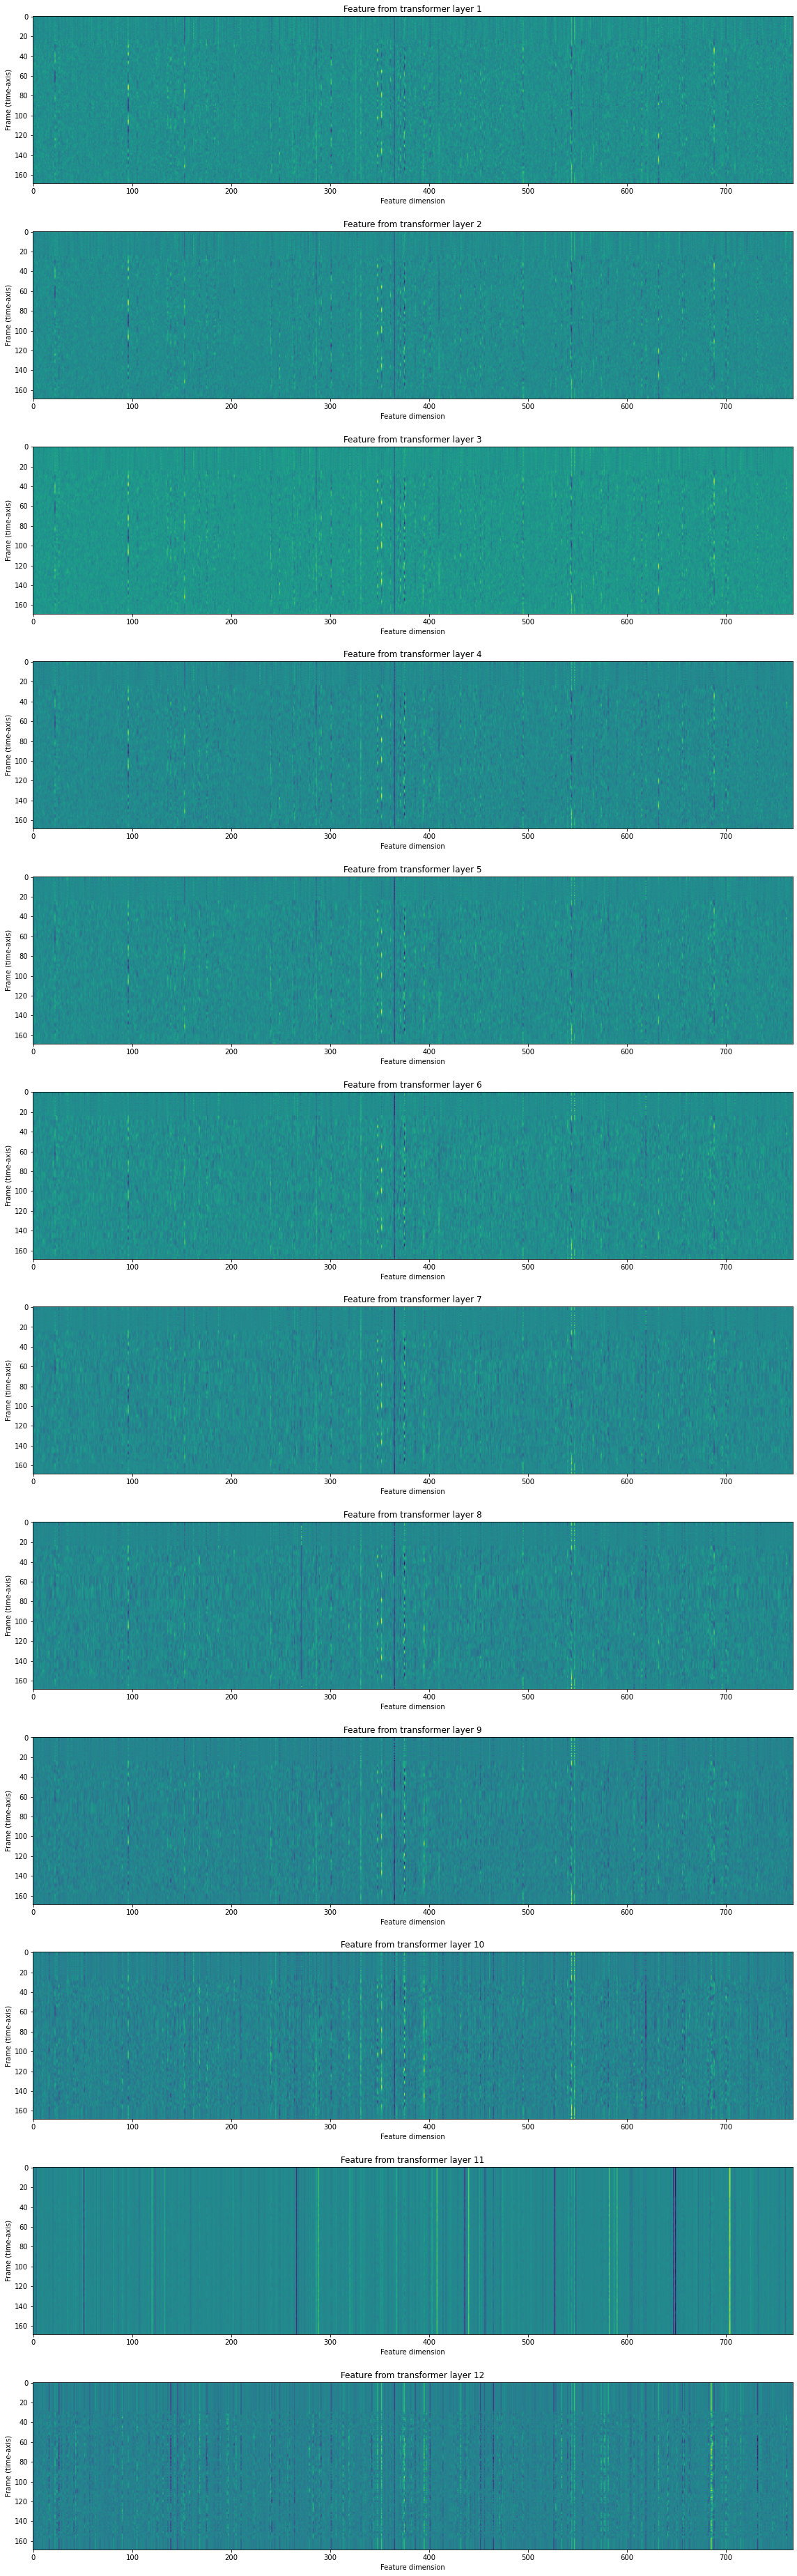

In [16]:
# visualize these features
fig, ax = plt.subplots(len(features), 1, figsize=(16, 4.3 * len(features)))
for i, feats in enumerate(features):
    ax[i].imshow(feats[0].cpu())
    ax[i].set_title(f"Feature from transformer layer {i+1}")
    ax[i].set_xlabel("Feature dimension")
    ax[i].set_ylabel("Frame (time-axis)")
plt.tight_layout()
plt.show()

In [17]:
with torch.inference_mode():
    emission, _ = model(waveform)

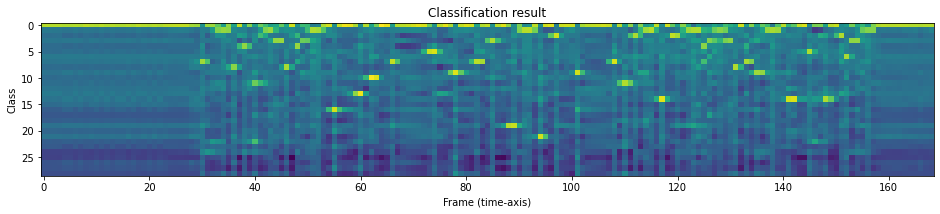

Class labels: ('-', '|', 'E', 'T', 'A', 'O', 'N', 'I', 'H', 'S', 'R', 'D', 'L', 'U', 'M', 'W', 'C', 'F', 'G', 'Y', 'P', 'B', 'V', 'K', "'", 'X', 'J', 'Q', 'Z')


In [18]:
plt.imshow(emission[0].cpu().T)
plt.title("Classification result")
plt.xlabel("Frame (time-axis)")
plt.ylabel("Class")
plt.show()
print("Class labels:", bundle.get_labels())

In [19]:
# generate the transcript using a greedy decoding algorithm
class GreedyCTCDecoder(torch.nn.Module):
    def __init__(self, labels, blank=0):
        super().__init__()
        self.labels = labels
        self.blank = blank

    def forward(self, emission: torch.Tensor) -> str:
        """Given a sequence emission over labels, get the best path string
        Args:
          emission (Tensor): Logit tensors. Shape `[num_seq, num_label]`.

        Returns:
          str: The resulting transcript
        """
        indices = torch.argmax(emission, dim=-1)  # [num_seq,]
        indices = torch.unique_consecutive(indices, dim=-1)
        indices = [i for i in indices if i != self.blank]
        return "".join([self.labels[i] for i in indices])

In [20]:
# Create decoder object 
decoder = GreedyCTCDecoder(labels=bundle.get_labels())
transcript = decoder(emission[0])

In [21]:
# check the result 
print(transcript)
IPython.display.Audio(SPEECH_FILE)

I|HAD|THAT|CURIOSITY|BESIDE|ME|AT|THIS|MOMENT|
